# Topic Modeling on News Snippets Using LDA
**Author:** Virginia Herrero

## Import Libraries and Download Resources

Import essential libraries for text preprocessing, topic modeling, and download required NLTK resources.

In [40]:
# Data manipulation
import pandas as pd

# Text processing
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from gensim.utils import simple_preprocess

# Download NLTK resources
nltk.download("stopwords")
nltk.download("wordnet")

# Topic Modeling
import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore, CoherenceModel

# Utilities
from pprint import pprint
from pprint import pformat
import json
from collections import defaultdict

# Visualizations
import pyLDAvis.gensim_models
import pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Define the Corpus

In natural language processing, a corpus is a collection of written or spoken texts that serves as the dataset for language-related tasks. The corpus is analyzed to identify language patterns and typically requires preprocessing and transformation into a format suitable for machine learning models.

In [41]:
corpus = [
    "The stock market closed higher today as tech shares rallied amid strong earnings reports.",
    "A major earthquake struck the coastal city early this morning, causing widespread damage.",
    "The government announced new policies aimed at reducing carbon emissions by 2030.",
    "Scientists discovered a new species of dinosaur in the remote mountains of Argentina.",
    "The local football team won the championship after a thrilling final match.",
    "Health officials urge citizens to get vaccinated as flu season approaches.",
    "A breakthrough in renewable energy technology promises cheaper solar panels.",
    "International leaders met to discuss trade agreements and economic cooperation.",
    "A popular film festival opened this weekend, showcasing independent movies from around the world.",
    "The city council approved plans for a new public park to promote green spaces.",
    
    "Tech startups attracted record venture capital funding in the last quarter.",
    "Severe flooding affected thousands as the hurricane swept across the southern coast.",
    "New education reforms aim to improve literacy rates in rural areas.",
    "Researchers developed a vaccine candidate showing promise against the new virus strain.",
    "The basketball team secured a playoff spot after a narrow victory last night.",
    "Authorities launched a campaign to combat misinformation on social media platforms.",
    "Advancements in artificial intelligence are reshaping the manufacturing sector.",
    "A new art exhibition opened downtown featuring contemporary local artists.",
    "The mayor announced plans to improve public transportation infrastructure.",
    "Farmers are adopting sustainable practices to tackle climate change impacts.",
    
    "Oil prices surged following geopolitical tensions in the Middle East.",
    "New study reveals the impact of microplastics on marine ecosystems.",
    "The annual marathon attracted thousands of runners from across the globe.",
    "Police investigated a cyberattack targeting the financial sector.",
    "Renewed peace talks offered hope for conflict resolution in the region.",
    "Wildlife conservation efforts led to an increase in endangered species populations.",
    "The tech giant released its latest smartphone model with advanced features.",
    "Local businesses reported strong sales during the holiday shopping season.",
    "Scientists are exploring the potential of quantum computing for drug discovery.",
    "Public health officials responded to a surge in measles cases this year.",
    
    "New legislation passed to support small businesses and entrepreneurs.",
    "Astronomers detected signals from a distant galaxy that may indicate life.",
    "The national soccer team prepared for the upcoming international tournament.",
    "Electric vehicle sales doubled as more charging stations became available.",
    "A documentary highlighted the challenges faced by indigenous communities.",
    "The finance ministry announced a budget increase for infrastructure projects.",
    "Researchers tested new water purification methods in urban areas.",
    "The local theater troupe received accolades for their latest production.",
    "Emergency responders worked around the clock after the wildfires spread.",
    "Scientists mapped the genome of a rare plant species found in the Amazon.",
    
    "The central bank adjusted interest rates to stabilize the economy.",
    "New regulations aim to reduce plastic waste in oceans and rivers.",
    "Community volunteers organized a cleanup drive at the city park.",
    "The education department launched an online learning platform for students.",
    "Sports officials confirmed the cancellation of events due to the pandemic.",
    "Renewable energy projects received funding from international organizations.",
    "New smartphone apps are helping users monitor their mental health.",
    "The local library hosted a workshop on digital literacy for seniors.",
    "Authorities investigated allegations of corruption in government contracts.",
    "Advances in battery technology promise longer-lasting electric cars.",
    
    "A cultural festival celebrated traditional music and dance from the region.",
    "The airline industry faced challenges as travel restrictions eased.",
    "Researchers discovered a potential treatment for Alzheimer's disease.",
    "The city hosted an international conference on climate change mitigation.",
    "New cybersecurity measures were implemented to protect critical infrastructure.",
    "Farmers reported better yields thanks to innovative irrigation techniques.",
    "The national chess champion defended her title in a tense match.",
    "Scientists studied the effects of air pollution on respiratory health.",
    "Public transportation ridership increased following fare reductions.",
    "The art museum unveiled a collection of rare historical artifacts.",
    
    "Government officials discussed strategies to boost tourism post-pandemic.",
    "The tech sector created thousands of new jobs in the last fiscal year.",
    "Community health clinics expanded services to underserved neighborhoods.",
    "New research sheds light on the origins of ancient civilizations.",
    "Environmental groups campaigned against deforestation in protected areas.",
    "The football league introduced new rules to enhance player safety.",
    "The startup developed a platform for remote team collaboration.",
    "Schools implemented measures to improve student well-being and mental health.",
    "The film director received awards at several international festivals.",
    "Scientists launched a satellite to monitor global climate patterns.",
    
    "The city council debated zoning changes to accommodate new housing developments.",
    "Electric buses were introduced to reduce urban air pollution.",
    "Researchers analyzed data from recent volcanic activity to predict eruptions.",
    "A charity event raised funds to support homeless shelters during winter.",
    "The government increased investment in renewable energy infrastructure.",
    "Tech companies collaborated on standards for data privacy protection.",
    "The wildlife reserve reported a surge in tourist visits this season.",
    "Community gardens flourished as residents embraced urban agriculture.",
    "A new study explored the psychological effects of social media use.",
    "Officials launched an initiative to promote literacy among children.",
    
    "The national park expanded trails to encourage eco-tourism.",
    "Local authorities improved emergency preparedness for natural disasters.",
    "The sports federation held training camps ahead of the championship.",
    "Scientists developed biodegradable materials to reduce plastic pollution.",
    "The government passed reforms to improve healthcare access nationwide.",
    "Entrepreneurs launched innovative fintech solutions for rural markets.",
    "The city experienced a heatwave causing health warnings for vulnerable populations.",
    "Artists collaborated on a mural celebrating cultural diversity.",
    "Renewable energy sources accounted for a record percentage of electricity generation.",
    "Authorities investigated fraud in recent public procurement contracts."
]

## Text processing

After defining the corpus, the next step is text preprocessing. This step involves cleaning and preparing the raw text data to make it suitable for modeling. 

In [42]:
# Set stopwords
stop_w = set(stopwords.words("english"))

In [43]:
# Tokenize the corpus
def doc_to_tokens(texts):
    """
    Tokenize a list of documents into clean lowercase words.

    Parameters:
    ----------
    texts (list of str): List of raw text documents.

    Yields:
    ----------
    list of str: Tokenized and lowercased words from each document,
                 with punctuation removed.
    """
    for doc in texts:
        yield simple_preprocess(doc, deacc=True)

tokens = list(doc_to_tokens(corpus))

In [44]:
# Remove stopwords
def rm_stopwords(docs):
    """
    Remove English stopwords from tokenized documents.

    Parameters:
    ----------
    docs (list of list of str): Tokenized documents (list of words).

    Returns:
    ----------
    list of list of str: Tokenized documents with stopwords removed.
    """
    return [[word for word in doc if word not in stop_w] for doc in docs]

tokens = rm_stopwords(tokens)

In [45]:
def get_wordnet_pos(treebank_tag):
    """
    Convert TreeBank POS tags (from NLTK's pos_tag) to WordNet POS tags,
    which are required for accurate lemmatization.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun if unknown

def preprocess_lemmatize(tokens):
    """
    Lemmatizes a list of tokenized documents using POS-aware lemmatization.

    Parameters
    ----------
    tokens : list of list of str
        List of tokenized documents. Each document is a list of word tokens.

    Returns
    -------
    docs : list of list of str
        List of lemmatized documents. Each document is a list of lemmatized word tokens.
    """
    lemmatizer = WordNetLemmatizer()
    docs = []

    for doc in tokens:
        # Tag each token with its part of speech (POS)
        tagged_tokens = pos_tag(doc)

        # Lemmatize each token using its POS tag
        lemmatized_doc = [
            lemmatizer.lemmatize(token, get_wordnet_pos(pos))
            for token, pos in tagged_tokens
        ]
        docs.append(lemmatized_doc)

    return docs


# Preprocess the tokens
docs = preprocess_lemmatize(tokens)

# Print first two processed documents
print("Sample processed documents:")
print(docs[:2])

Sample processed documents:
[['stock', 'market', 'close', 'high', 'today', 'tech', 'share', 'rally', 'amid', 'strong', 'earnings', 'report'], ['major', 'earthquake', 'strike', 'coastal', 'city', 'early', 'morning', 'cause', 'widespread', 'damage']]


## Create Dictionary

A dictionary in natural language processing is a mapping between unique words (tokens) in the corpus and their integer IDs. It serves as a vocabulary reference that converts text data into numerical formats required by machine learning models. In topic modeling, the dictionary helps translate words into a consistent numeric representation used to build the corpus and train models like LDA.

In [46]:
# Create a dictionary representation of the documents
word_dict = corpora.Dictionary(docs)

# Print the first 10 token-id
print("Sample dictionary token-id pairs:")
print(list(word_dict.items())[:10])

Sample dictionary token-id pairs:
[(0, 'amid'), (1, 'close'), (2, 'earnings'), (3, 'high'), (4, 'market'), (5, 'rally'), (6, 'report'), (7, 'share'), (8, 'stock'), (9, 'strong')]


## Create Bag-of-Words

A bag of words (BoW) is a simple and commonly used method for representing text data in natural language processing. It treats a document as a "bag" of individual words, ignoring grammar and word order, but keeping track of how many times each word appears. Each document is converted into a vector of word counts based on a predefined vocabulary. In conclusion, a bag of words is a numerical representation of text that captures word frequency, used to feed text data into machine learning models.


In [47]:
# Create the bag-of-words corpus
bow_corpus = [word_dict.doc2bow(doc) for doc in docs]

# Print the bag-of-words for the first document
print("Sample bag-of-words representation for first document:")
print(bow_corpus[0])

Sample bag-of-words representation for first document:
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


## LDA Model

Topic modeling is the process of uncovering hidden thematic structures in a collection of documents. LDA (Latent Dirichlet Allocation) is one of the most commonly used algorithms for this task. It identifies groups of words that frequently occur together and uses them to define topics, allowing each document to be represented as a mixture of these topics.

In [48]:
# Train the LDA model
lda_model = LdaMulticore(
    corpus = bow_corpus,        # The BoW representation of the documents
    id2word = word_dict,        # The dictionary mapping of word IDs
    num_topics = 3,             # Number of topics to extract
    random_state = 42,          # For reproducibility
    passes = 10,                # Number of passes through the corpus during training
)

# Display the discovered topics
from pprint import pprint
pprint(lda_model.print_topics(num_words = 10))

[(0,
  '0.012*"launch" + 0.011*"new" + 0.009*"scientist" + 0.009*"official" + '
  '0.009*"platform" + 0.009*"pollution" + 0.009*"local" + 0.009*"team" + '
  '0.006*"government" + 0.006*"improve"'),
 (1,
  '0.013*"new" + 0.008*"tech" + 0.008*"energy" + 0.008*"renewable" + '
  '0.008*"community" + 0.008*"thousand" + 0.008*"health" + 0.006*"local" + '
  '0.006*"report" + 0.006*"last"'),
 (2,
  '0.023*"new" + 0.017*"city" + 0.015*"public" + 0.009*"aim" + '
  '0.009*"announce" + 0.009*"investigate" + 0.007*"health" + 0.007*"authority" '
  '+ 0.007*"researcher" + 0.006*"government"')]


## Evaluate the Model

Model evaluation measures how well a topic model produces coherent and meaningful topics. This process ensures the model’s results are reliable and interpretable. 

In [49]:
# Build coherence model
coherence_model_lda = CoherenceModel(
    model = lda_model, 
    texts = docs,          
    dictionary = word_dict,
    coherence = "c_v"      
)

# Compute coherence score
coherence_score = coherence_model_lda.get_coherence()

print(f"Coherence Score: {coherence_score:.4f}")

Coherence Score: 0.6217


The model’s coherence score is quite good, nonetheless the next step is to train multiple LDA models using different numbers of topics and calculate their coherence scores. By comparing these scores, it finds the optimal number of topics that improves the model’s coherence and overall quality.

In [50]:
# Train multiple LDA models to find the best
def compute_coherence_values(dictionary, corpus, texts, start = 2, limit = 10, step = 1):
    """
    Train LDA models with varying number of topics and compute their coherence scores.

    Parameters:
    ----------
    - dictionary (gensim.corpora.Dictionary): Mapping of word IDs to words.
    - corpus (list of list of (int, int)): Bag-of-words representation of documents.
    - texts (list of list of str): Preprocessed tokenized documents.
    - start (int): Minimum number of topics to try (inclusive).
    - limit (int): Maximum number of topics to try (inclusive).
    - step (int): Step size between topic numbers.

    Returns:
    ----------
    - model_list (list): List of trained LDA models.
    - coherence_values (list): List of coherence scores corresponding to each model.
    """
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit + 1, step):
        print(f"Training LDA with {num_topics} topics...")
        model = LdaMulticore(
            corpus = corpus,
            id2word = dictionary,
            num_topics = num_topics,
            random_state = 42,
            passes = 10,
        )
        model_list.append(model)
        
        coherence_model = CoherenceModel(
            model = model,
            texts = texts,
            dictionary = dictionary,
            coherence = "c_v"
        )
        coherence_score = coherence_model.get_coherence()
        coherence_values.append(coherence_score)
        
        print(f"Coherence Score for {num_topics} topics: {coherence_score:.4f}\n")
    
    return model_list, coherence_values

In [51]:
# Run coherence evaluation for topics 2 to 10
model_list, coherence_values = compute_coherence_values(word_dict, bow_corpus, docs, start = 2, limit = 10, step = 1)

# Print summary
for num, score in zip(range(2, 11), coherence_values):
    print(f"Num Topics = {num} => Coherence Score = {score:.4f}")

Training LDA with 2 topics...
Coherence Score for 2 topics: 0.6156

Training LDA with 3 topics...
Coherence Score for 3 topics: 0.6217

Training LDA with 4 topics...
Coherence Score for 4 topics: 0.6119

Training LDA with 5 topics...
Coherence Score for 5 topics: 0.6164

Training LDA with 6 topics...
Coherence Score for 6 topics: 0.5774

Training LDA with 7 topics...
Coherence Score for 7 topics: 0.5817

Training LDA with 8 topics...
Coherence Score for 8 topics: 0.5387

Training LDA with 9 topics...
Coherence Score for 9 topics: 0.5271

Training LDA with 10 topics...
Coherence Score for 10 topics: 0.4770

Num Topics = 2 => Coherence Score = 0.6156
Num Topics = 3 => Coherence Score = 0.6217
Num Topics = 4 => Coherence Score = 0.6119
Num Topics = 5 => Coherence Score = 0.6164
Num Topics = 6 => Coherence Score = 0.5774
Num Topics = 7 => Coherence Score = 0.5817
Num Topics = 8 => Coherence Score = 0.5387
Num Topics = 9 => Coherence Score = 0.5271
Num Topics = 10 => Coherence Score = 0.477

In [52]:
# Save the coherence scores
with open("../results/metrics/lda-coherence-scores.txt", "w") as f:
    f.write("\n".join([f"Num Topics = {num} => Coherence Score = {score:.4f}" 
                       for num, score in zip(range(2, 11), coherence_values)]))

In [53]:
# The best model
# Find the index of the best coherence score
best_model_index = coherence_values.index(max(coherence_values))

# Select the best model
best_model = model_list[best_model_index]

# Print summary of the best model
print(f"\nBest LDA Model has {best_model.num_topics} topics with coherence score {coherence_values[best_model_index]:.4f}\n")

# Pretty-print the topics of the best model
pprint(best_model.print_topics(num_words = 20))


Best LDA Model has 3 topics with coherence score 0.6217

[(0,
  '0.012*"launch" + 0.011*"new" + 0.009*"scientist" + 0.009*"official" + '
  '0.009*"platform" + 0.009*"pollution" + 0.009*"local" + 0.009*"team" + '
  '0.006*"government" + 0.006*"improve" + 0.006*"study" + 0.006*"national" + '
  '0.006*"urban" + 0.006*"festival" + 0.006*"electric" + 0.006*"literacy" + '
  '0.006*"international" + 0.006*"develop" + 0.006*"introduce" + 0.006*"air"'),
 (1,
  '0.013*"new" + 0.008*"tech" + 0.008*"energy" + 0.008*"renewable" + '
  '0.008*"community" + 0.008*"thousand" + 0.008*"health" + 0.006*"local" + '
  '0.006*"report" + 0.006*"last" + 0.006*"season" + 0.006*"sector" + '
  '0.006*"specie" + 0.006*"expand" + 0.006*"protect" + 0.006*"emergency" + '
  '0.006*"entrepreneur" + 0.006*"across" + 0.006*"market" + 0.006*"business"'),
 (2,
  '0.023*"new" + 0.017*"city" + 0.015*"public" + 0.009*"aim" + '
  '0.009*"announce" + 0.009*"investigate" + 0.007*"health" + 0.007*"authority" '
  '+ 0.007*"resear

In [54]:
# Save the best model results as a text file
with open("../results/metrics/best-lda-model.txt", "w") as f:
    f.write(f"Best LDA Model: {best_model.num_topics} topics\n")
    f.write(f"Coherence Score: {coherence_values[best_model_index]:.4f}\n\n")
    f.write(pformat(best_model.print_topics(num_words = 20)))

In [55]:
# Save the trained best model
best_model.save("../model/best-lda-model.model")

The model was tested with different numbers of topics, and the quality of the topics improved as the number increased, peaking at 3 topics with the best coherence score of 0.6217. This means the model found the most meaningful and distinct themes when using 3 topics. The topics include groups of related words representing different themes like environment, finance, and health. While the score shows the model captures some clear patterns, there is still room to improve the results with further tuning or preprocessing.

## Extract Document Topic Distributions

The topic distribution shows how much each topic contributes to a given document. After training the LDA model, each document is represented as a mixture of topics with associated probabilities. This helps identify the dominant themes in each document and understand how content is distributed across topics.

In [56]:
# Get topic distributions for all documents in the BoW corpus
doc_topics = [best_model.get_document_topics(doc) for doc in bow_corpus]

# Print original document with its topic distribution
for i in range(len(bow_corpus)):
    print(f"\nDocument {i + 1}:\n{corpus[i]}")
    print("Topic Distribution:")
    for topic_id, prob in doc_topics[i]:
        print(f"  Topic {topic_id}: {prob:.4f}")


Document 1:
The stock market closed higher today as tech shares rallied amid strong earnings reports.
Topic Distribution:
  Topic 0: 0.0260
  Topic 1: 0.9479
  Topic 2: 0.0260

Document 2:
A major earthquake struck the coastal city early this morning, causing widespread damage.
Topic Distribution:
  Topic 0: 0.0305
  Topic 1: 0.0305
  Topic 2: 0.9391

Document 3:
The government announced new policies aimed at reducing carbon emissions by 2030.
Topic Distribution:
  Topic 0: 0.0389
  Topic 1: 0.0378
  Topic 2: 0.9233

Document 4:
Scientists discovered a new species of dinosaur in the remote mountains of Argentina.
Topic Distribution:
  Topic 0: 0.0394
  Topic 1: 0.0393
  Topic 2: 0.9212

Document 5:
The local football team won the championship after a thrilling final match.
Topic Distribution:
  Topic 0: 0.9151
  Topic 1: 0.0428
  Topic 2: 0.0421

Document 6:
Health officials urge citizens to get vaccinated as flu season approaches.
Topic Distribution:
  Topic 0: 0.0353
  Topic 1: 0.93

In [57]:
# Save document topic distribution as text file
with open( "../results/documents/document-topic-distributions.txt", "w") as f:
    for i, topics in enumerate(doc_topics):
        f.write(f"\nDocument {i + 1}:\n{' '.join(docs[i])}\n")
        f.write("Topic Distribution:\n")
        for topic_id, prob in topics:
            f.write(f"  Topic {topic_id}: {prob:.4f}\n")

## Identify Dominant Topics

In [58]:
# Identify the dominant topic in each document
dominant_topics = []
for i, topics in enumerate(doc_topics):
    if topics:
        # Get the topic with the highest probability
        dominant_topic = max(topics, key=lambda x: x[1])
        dominant_topics.append((i, dominant_topic[0], dominant_topic[1]))
        print(f"Document {i+1}: Dominant Topic = {dominant_topic[0]}, Score = {dominant_topic[1]:.4f}")
    else:
        print(f"Document {i+1}: No dominant topic found")

Document 1: Dominant Topic = 1, Score = 0.9479
Document 2: Dominant Topic = 2, Score = 0.9391
Document 3: Dominant Topic = 2, Score = 0.9233
Document 4: Dominant Topic = 2, Score = 0.9212
Document 5: Dominant Topic = 0, Score = 0.9151
Document 6: Dominant Topic = 1, Score = 0.9308
Document 7: Dominant Topic = 1, Score = 0.9223
Document 8: Dominant Topic = 1, Score = 0.9210
Document 9: Dominant Topic = 0, Score = 0.9380
Document 10: Dominant Topic = 2, Score = 0.9382
Document 11: Dominant Topic = 0, Score = 0.9260
Document 12: Dominant Topic = 1, Score = 0.9329
Document 13: Dominant Topic = 2, Score = 0.9260
Document 14: Dominant Topic = 2, Score = 0.9305
Document 15: Dominant Topic = 1, Score = 0.9302
Document 16: Dominant Topic = 0, Score = 0.9209
Document 17: Dominant Topic = 1, Score = 0.9035
Document 18: Dominant Topic = 0, Score = 0.9300
Document 19: Dominant Topic = 2, Score = 0.9145
Document 20: Dominant Topic = 1, Score = 0.9198
Document 21: Dominant Topic = 2, Score = 0.9250
D

In [59]:
# Save dominant topics as a text file
with open("../results/documents/document-dominant-topics.txt", "w") as f:
    for i, topics in enumerate(doc_topics):
        if topics:
            dominant_topic = max(topics, key=lambda x: x[1])
            f.write(f"Document {i+1}: Dominant Topic = {dominant_topic[0]}, Score = {dominant_topic[1]:.4f}\n")
        else:
            f.write(f"Document {i+1}: No dominant topic found\n")

## Model Interpretation

Model interpretation focuses on understanding the topics identified by the model. Each topic consists of a group of keywords that frequently appear together across documents. The steps to interpret the model involves:

- **Top keywords**: Lists of the most relevant words for each topic, which help describe the main idea of that topic.

- **Representative documents**: Examples of documents where a specific topic is most prominent, providing context for what the topic looks like in actual text.


### **Top Keywords**

The top keywords of an LDA model are the most representative words for each topic, revealing the main themes discussed across the documents.

In [60]:
def get_topic_keywords(lda_model, num_words = 10):
    """
    Extract the top keywords (terms) that define each topic in the LDA model.

    Parameters
    ----------
    lda_model : gensim.models.LdaModel
        A trained LDA model.
    num_words : int, optional
        Number of top words to extract for each topic (default is 10).

    Returns
    -------
    dict
        Dictionary with topic IDs as keys and lists of top keywords as values.
    """
    topic_keywords = {}
    for topic_id in range(lda_model.num_topics):
        topic_keywords[topic_id] = [word for word, _ in lda_model.show_topic(topic_id, topn = num_words)]
    return topic_keywords

In [61]:
topic_keywords = get_topic_keywords(best_model)
topic_keywords

{0: ['launch',
  'new',
  'scientist',
  'official',
  'platform',
  'pollution',
  'local',
  'team',
  'government',
  'improve'],
 1: ['new',
  'tech',
  'energy',
  'renewable',
  'community',
  'thousand',
  'health',
  'local',
  'report',
  'last'],
 2: ['new',
  'city',
  'public',
  'aim',
  'announce',
  'investigate',
  'health',
  'authority',
  'researcher',
  'government']}

### **Representative documets per topic**

The function identifies and returns the most relevant documents for each topic in an LDA model, highlighting examples that best represent each topic.

In [62]:
def get_topic_representative_docs(lda_model, corpus, texts, topn_docs=3):
    """
    Identify representative documents for each topic based on the topic distribution.

    Parameters
    ----------
    lda_model : gensim.models.LdaModel
        A trained LDA model.
    corpus : list of list of (int, int)
        Bag-of-words representation of the corpus.
    texts : list of str
        List of original or preprocessed document texts.
    topn_docs : int, optional
        Number of most representative documents to return per topic (default is 3).

    Returns
    -------
    dict
        Dictionary with topic IDs as keys and lists of (doc_index, topic_probability) tuples as values.
    """
    topic_docs = defaultdict(list)
    for i, bow in enumerate(corpus):
        topic_probs = lda_model.get_document_topics(bow)
        for topic_id, prob in topic_probs:
            topic_docs[topic_id].append((i, prob))

    for topic_id in topic_docs:
        topic_docs[topic_id] = sorted(topic_docs[topic_id], key=lambda x: -x[1])[:topn_docs]

    return topic_docs

### **Topic Interpretation**

Using the helper functions from before, the main function shows each topic with its top keywords and a few example documents, helping to better understand what each topic means.

In [63]:
def interpret_topics(lda_model, corpus, texts, num_words = 10, topn_docs = 3, save_path = None):
    """
    Display an interpretation of each topic by printing its top keywords and sample representative documents.
    Optionally saves the topic keywords to a JSON file.

    Parameters
    ----------
    lda_model : gensim.models.LdaModel
        A trained LDA model.
    corpus : list of list of (int, int)
        Bag-of-words representation of the corpus.
    texts : list of str or list of list of str
        List of original or preprocessed document texts, either as strings or lists of tokens.
    num_words : int, optional
        Number of top keywords to display per topic (default is 10).
    topn_docs : int, optional
        Number of sample documents to show per topic (default is 3).
    save_path : str or None, optional
        If provided, will save topic keywords to a JSON file with the given prefix.

    Returns
    -------
    None
        Outputs are printed to the notebook console. If `save_path` is given, a JSON file is saved.
    """
    topic_keywords = get_topic_keywords(lda_model, num_words)
    topic_docs = get_topic_representative_docs(lda_model, corpus, texts, topn_docs)

    for topic_id in range(lda_model.num_topics):
        print(f"\nTopic {topic_id}: {', '.join(topic_keywords[topic_id])}")
        print("Representative Documents:")
        for doc_index, prob in topic_docs[topic_id]:
            doc_text = texts[doc_index]
            # If doc_text is a list (tokenized), join tokens; otherwise use as is
            if isinstance(doc_text, list):
                snippet = " ".join(doc_text)[:300].replace("\n", " ")
            else:
                snippet = doc_text[:300].replace("\n", " ")
            print(f"Prob: {prob:.2f} | {snippet}")
        print('-' * 80)

    if save_path:
        with open(save_path, "w", encoding = "utf-8") as f:
            json.dump(topic_keywords, f, indent = 2)


In [64]:
# Interpret the topics and save top keywords
interpret_topics(best_model, bow_corpus, docs, num_words = 10, topn_docs = 3, save_path = "../results/topics/lda-model-topic-keywords.json")


Topic 0: launch, new, scientist, official, platform, pollution, local, team, government, improve
Representative Documents:
Prob: 0.94 | popular film festival open weekend showcasing independent movie around world
Prob: 0.93 | new art exhibition open downtown featuring contemporary local artist
Prob: 0.93 | tech startup attract record venture capital funding last quarter
--------------------------------------------------------------------------------

Topic 1: new, tech, energy, renewable, community, thousand, health, local, report, last
Representative Documents:
Prob: 0.95 | stock market close high today tech share rally amid strong earnings report
Prob: 0.93 | severe flooding affect thousand hurricane sweep across southern coast
Prob: 0.93 | health official urge citizen get vaccinate flu season approach
--------------------------------------------------------------------------------

Topic 2: new, city, public, aim, announce, investigate, health, authority, researcher, government
Rep

### **Topic Labeling**

Based on the topic interpretation results, the next step is to manually assign labels to each topic for clearer understanding. To do this, the topics’ top keywords and representative documents are reviewed and given the most appropriate labels.

**Topic 0: Local Events**

This topic is all about new local projects, art shows, and innovation news.

- Keywords like *launch, platform, official, local, team, government* point to different initiatives and programs.
- Representative documents focus on *events, exhibitions, startups*, and local or cultural highlights.

**Topic 1: Public Affairs**

This one covers big news that affects communities, especially around health, tech, and weather.

- Keywords span *tech, energy, community, health, report* — all quite broad but tied to public interest.
- Representative documents deal with *financial markets, natural disasters, and health advisories*.

**Topic 2: Urban development**

This topic focuses on city government, public services, and planning.

- Keywords like *city, public, announce, health, authority, government* point to administrative or civic matters.
- Representative documents focus on *earthquakes, public parks, and zoning/development decisions*.

In [65]:
# Create dictionary with the labels assigned to each topic
topic_labels_dict = {
    0: "Local Events",
    1: "Public Affairs",
    2: "Urban Development",
}

In [66]:
with open("../results/topics/lda-model-topic-labels.json", "w", encoding = "utf-8") as f:
            json.dump(topic_labels_dict, f, indent=2)

##  Document Clustering

Document clustering involves grouping news snippets based on the topics discovered by the LDA model. For each document, the model calculates how likely it is to belong to each topic. The topic with the highest probability is assigned as the document’s dominant topic.

Using this dominant topic, documents are then grouped into topic clusters, making it easier to analyze and interpret common themes across the dataset. This step helps organize the content meaningfully and supports the manual labeling and evaluation of the model's performance.

### **Cluster Documents by Dominant Topic**

Documents are grouped according to the topic the LDA model predicts they most likely belong to. In a DataFrame, each document is assigned its dominant topic, the probability of that topic, and the full topic distribution.

In [67]:
def cluster_documents_by_topic(lda_model, corpus, texts):
    """
    Cluster documents by assigning their dominant topic, along with full topic distribution.

    Parameters
    ----------
    lda_model : gensim.models.LdaModel
        A trained LDA model.
    corpus : list of list of (int, int)
        Bag-of-words representation of the corpus.
    texts : list of str
        List of original or preprocessed document texts.

    Returns
    -------
    pd.DataFrame
        A DataFrame containing:
        - doc_id: index of the document
        - text: the full text of the document
        - dominant_topic: topic ID with highest probability
        - dominant_prob: probability score of the dominant topic
        - topic_distribution: full distribution over topics
    """
    doc_data = []

    for i, bow in enumerate(corpus):
        topic_probs = lda_model.get_document_topics(bow)
        dominant_topic, dominant_prob = max(topic_probs, key=lambda x: x[1])
        topic_dist_dict = dict(topic_probs)

        doc_data.append({
            "doc_id": i,
            "text": texts[i],
            "dominant_topic": dominant_topic,
            "dominant_prob": dominant_prob,
            "topic_distribution": topic_dist_dict
        })

    return pd.DataFrame(doc_data)

In [68]:
# Apply the function
df_topic_clusters = cluster_documents_by_topic(best_model, bow_corpus, docs)
df_topic_clusters

,doc_id,text,dominant_topic,dominant_prob,topic_distribution
0,0,"[stock, market, close, high, today, tech, shar...",1,0.947929,"{0: 0.02602622, 1: 0.9479286, 2: 0.026045185}"
1,1,"[major, earthquake, strike, coastal, city, ear...",2,0.939058,"{0: 0.030475467, 1: 0.03046617, 2: 0.93905836}"
2,2,"[government, announce, new, policy, aim, reduc...",2,0.923316,"{0: 0.038900066, 1: 0.037783574, 2: 0.9233163}"
3,3,"[scientist, discover, new, specie, dinosaur, r...",2,0.921240,"{0: 0.03941505, 1: 0.039345123, 2: 0.92123985}"
4,4,"[local, football, team, championship, thrill, ...",0,0.915122,"{0: 0.91512233, 1: 0.042774457, 2: 0.04210323}"
...,...,...,...,...,...
85,85,"[entrepreneur, launch, innovative, fintech, so...",1,0.907998,"{0: 0.047991537, 1: 0.90799767, 2: 0.044010825}"
86,86,"[city, experience, heatwave, cause, health, wa...",2,0.923565,"{0: 0.037782848, 1: 0.038652565, 2: 0.9235646}"
87,87,"[artist, collaborate, mural, celebrate, cultur...",1,0.898060,"{0: 0.052654754, 1: 0.89806, 2: 0.04928524}"
88,88,"[renewable, energy, source, account, record, p...",1,0.924315,"{0: 0.038413577, 1: 0.9243152, 2: 0.037271228}"


### **Add Topic Labels**

To make the results easier to understand, each document is assigned the label of the topic it most likely belongs to in the DataFrame.

In [69]:
def add_topic_labels(df, topic_labels_dict):
    """
    Add human-readable labels to the clustered documents DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with at least a 'dominant_topic' column.
    topic_labels_dict : dict
        Dictionary mapping topic IDs to human-readable labels.

    Returns
    -------
    pd.DataFrame
        Updated DataFrame with an added 'topic_label' column.
    """
    df["topic_label"] = df["dominant_topic"].map(topic_labels_dict)
    return df

In [70]:
# Add labels to DataFrame
df_topic_clusters = add_topic_labels(df_topic_clusters, topic_labels_dict)
df_topic_clusters

,doc_id,text,dominant_topic,dominant_prob,topic_distribution,topic_label
0,0,"[stock, market, close, high, today, tech, shar...",1,0.947929,"{0: 0.02602622, 1: 0.9479286, 2: 0.026045185}",Public Affairs
1,1,"[major, earthquake, strike, coastal, city, ear...",2,0.939058,"{0: 0.030475467, 1: 0.03046617, 2: 0.93905836}",Urban Development
2,2,"[government, announce, new, policy, aim, reduc...",2,0.923316,"{0: 0.038900066, 1: 0.037783574, 2: 0.9233163}",Urban Development
3,3,"[scientist, discover, new, specie, dinosaur, r...",2,0.921240,"{0: 0.03941505, 1: 0.039345123, 2: 0.92123985}",Urban Development
4,4,"[local, football, team, championship, thrill, ...",0,0.915122,"{0: 0.91512233, 1: 0.042774457, 2: 0.04210323}",Local Events
...,...,...,...,...,...,...
85,85,"[entrepreneur, launch, innovative, fintech, so...",1,0.907998,"{0: 0.047991537, 1: 0.90799767, 2: 0.044010825}",Public Affairs
86,86,"[city, experience, heatwave, cause, health, wa...",2,0.923565,"{0: 0.037782848, 1: 0.038652565, 2: 0.9235646}",Urban Development
87,87,"[artist, collaborate, mural, celebrate, cultur...",1,0.898060,"{0: 0.052654754, 1: 0.89806, 2: 0.04928524}",Public Affairs
88,88,"[renewable, energy, source, account, record, p...",1,0.924315,"{0: 0.038413577, 1: 0.9243152, 2: 0.037271228}",Public Affairs


In [71]:
# Save clusters as a csv file
df_topic_clusters.to_csv("../results/documents/lda-model-doc-clusters.csv", index = False)

### **Explore Clustered Documents**

Quickly review the documents assigned to each label to verify whether the clusters are correctly classifying them.

In [72]:
for topic in df_topic_clusters["dominant_topic"].unique():
    label = topic_labels_dict.get(topic, "")
    print(f"\n Topic {topic} | {label}")
    print('-' * 80)
    sample_docs = df_topic_clusters[df_topic_clusters["dominant_topic"] == topic]["text"].head(3)
    for doc in sample_docs:
        print(doc)


 Topic 1 | Public Affairs
--------------------------------------------------------------------------------
['stock', 'market', 'close', 'high', 'today', 'tech', 'share', 'rally', 'amid', 'strong', 'earnings', 'report']
['health', 'official', 'urge', 'citizen', 'get', 'vaccinate', 'flu', 'season', 'approach']
['breakthrough', 'renewable', 'energy', 'technology', 'promise', 'cheap', 'solar', 'panel']

 Topic 2 | Urban Development
--------------------------------------------------------------------------------
['major', 'earthquake', 'strike', 'coastal', 'city', 'early', 'morning', 'cause', 'widespread', 'damage']
['government', 'announce', 'new', 'policy', 'aim', 'reduce', 'carbon', 'emission']
['scientist', 'discover', 'new', 'specie', 'dinosaur', 'remote', 'mountain', 'argentina']

 Topic 0 | Local Events
--------------------------------------------------------------------------------
['local', 'football', 'team', 'championship', 'thrill', 'final', 'match']
['popular', 'film', 'festiv

## Visualizations

### **Topic Visualization**

In [73]:
# Prepare the visualization
lda_vis = pyLDAvis.gensim_models.prepare(best_model, bow_corpus, word_dict)

# Display in notebook
pyLDAvis.display(lda_vis)

In [74]:
# Save the visualization
pyLDAvis.save_html(lda_vis, "../results/figures/lda_visualization.html")

### **Top Words per Topic**

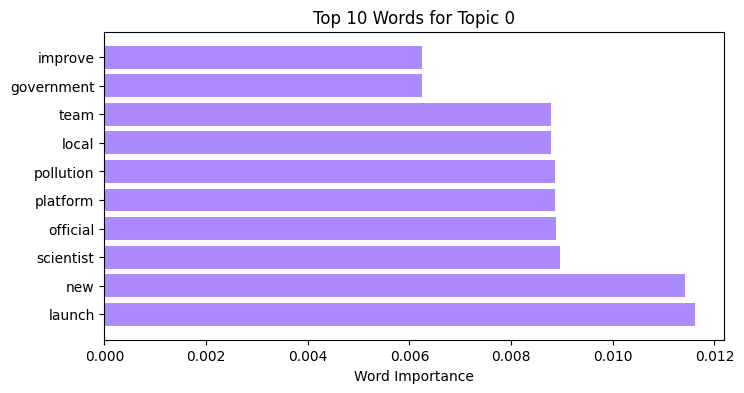

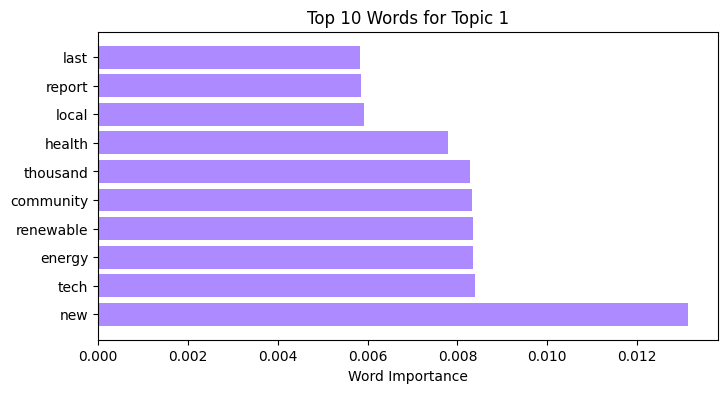

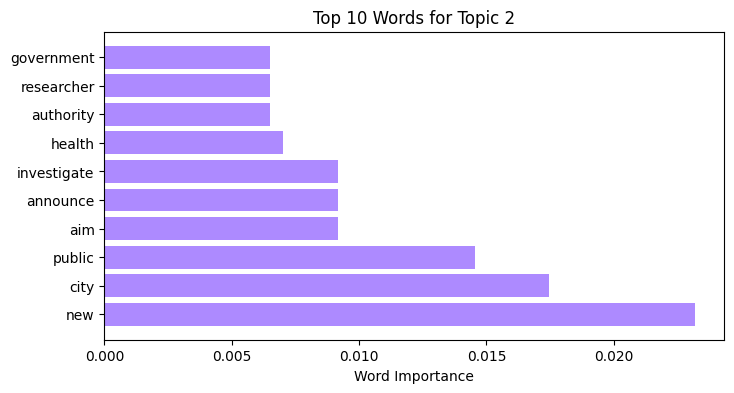

In [108]:
for topic_id in range(lda_model.num_topics):
    terms = best_model.show_topic(topic_id, topn=10)
    words, weights = zip(*terms)
    plt.figure(figsize = (8, 4))
    plt.barh(words, weights, color = "#ad8aff")
    plt.title(f"Top 10 Words for Topic {topic_id}")
    plt.xlabel("Word Importance")

### **WordCloud per Topic**

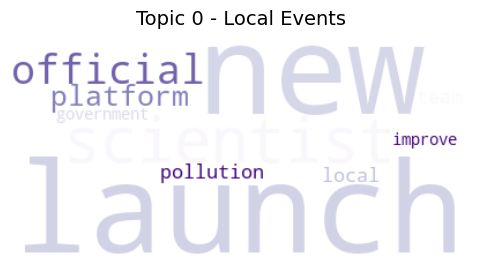

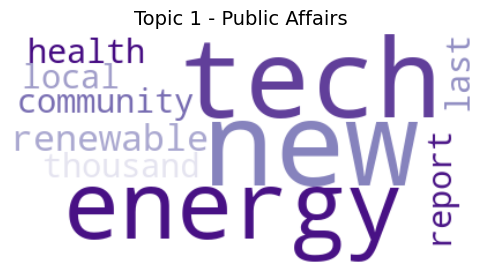

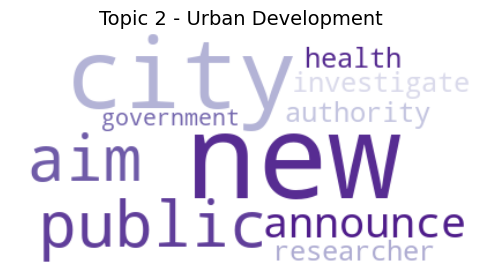

In [115]:
from wordcloud import WordCloud

for i in range(3):  # 3 Topics
    words = topic_keywords[i] 
    word_freq = {word: 1 for word in words}
    wc = WordCloud(background_color = "white", max_words=10, colormap = "Purples").generate_from_frequencies(word_freq)
    
    # Create a new figure for each topic
    plt.figure(figsize =(7, 3))
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.title(f"Topic {i} - {topic_labels_dict.get(i, '')}", size = 14)

### **Documents per Dominant Topic**

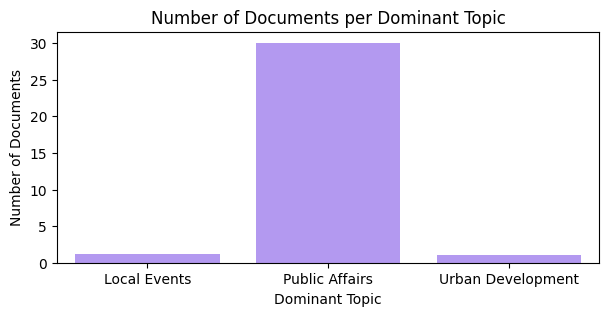

In [109]:
#Get topic distribution per document
df_topic_clusters = pd.DataFrame([dict(best_model.get_document_topics(bow, minimum_probability=0)) for bow in bow_corpus])
df_topic_clusters["dominant_topic"] = df_topic_clusters.idxmax(axis=1)
df_topic_clusters["topic_label"] = df_topic_clusters["dominant_topic"].map(topic_labels_dict)

plt.figure(figsize=(7, 3))
sns.countplot(x="dominant_topic", data = df_topic_clusters, color = "#ad8aff")
plt.title("Number of Documents per Dominant Topic")
plt.xlabel("Dominant Topic")
plt.ylabel("Number of Documents")
plt.xticks(ticks=range(3), labels=[topic_labels_dict[i] for i in range(3)]);